<a href="https://colab.research.google.com/github/rhiosutoyo/Teaching-Deep-Learning-and-Its-Applications/blob/main/10_3_densenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DenseNet Model
This PyTorch code loads the CIFAR-10 dataset, applies transformations, and defines a DenseNet model.
* It uses a cross-entropy loss function and SGD optimizer.
* The train function trains the model for five epochs, tracking training and validation losses. The losses are plotted to show model performance.
* The test function evaluates the model on three test samples, displaying the images and predicted labels for comparison with the ground truth.
* This provides a comprehensive framework for developing and assessing a DenseNet-based image classification model.

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch 1/5: 100%|██████████| 782/782 [00:50<00:00, 15.48batch/s]


Epoch 1/5 - Training Loss: 1.5666 - Validation Loss: 1.2448


Epoch 2/5: 100%|██████████| 782/782 [00:49<00:00, 15.69batch/s]


Epoch 2/5 - Training Loss: 1.1204 - Validation Loss: 1.0121


Epoch 3/5: 100%|██████████| 782/782 [00:49<00:00, 15.88batch/s]


Epoch 3/5 - Training Loss: 0.8961 - Validation Loss: 0.9368


Epoch 4/5: 100%|██████████| 782/782 [00:50<00:00, 15.60batch/s]


Epoch 4/5 - Training Loss: 0.7417 - Validation Loss: 0.8213


Epoch 5/5: 100%|██████████| 782/782 [00:50<00:00, 15.52batch/s]


Epoch 5/5 - Training Loss: 0.6210 - Validation Loss: 0.8333


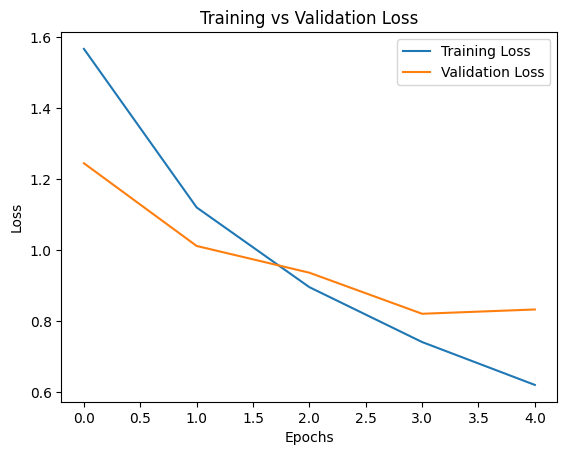

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Load DenseNet model
model = torchvision.models.densenet121(pretrained=False, num_classes=10)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training function
def train(model, trainloader, testloader, criterion, optimizer, epochs=5):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    training_loss = []
    validation_loss = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", unit='batch'):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_train_loss = running_loss / len(trainloader)
        training_loss.append(avg_train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(testloader)
        validation_loss.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} - Training Loss: {avg_train_loss:.4f} - Validation Loss: {avg_val_loss:.4f}")

    return training_loss, validation_loss

# Train the model and get the loss metrics
training_loss, validation_loss = train(model, trainloader, testloader, criterion, optimizer, epochs=5)

# Plotting the loss
plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

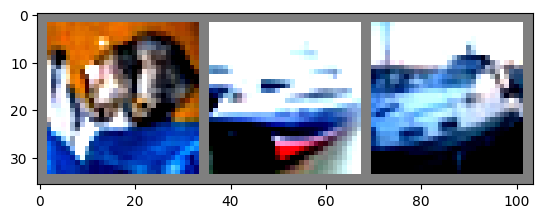

GroundTruth:    cat  ship  ship
Predicted:    cat   car  ship


In [12]:
import numpy as np

# Test the model on three test samples and display the results
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def test(model, testloader, num_samples=3):
    model.eval()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images, labels = images[:num_samples].to(device), labels[:num_samples].to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show images
    imshow(torchvision.utils.make_grid(images.cpu()))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(num_samples)))
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(num_samples)))

# Define classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Test the model
test(model, testloader, num_samples=3)